In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
rng = np.random.default_rng(seed=42)
m = 200 
X = 2*rng.random((m,1)) 
y = 4 + 3*X + rng.standard_normal((m,1))
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (200, 1)
y shape: (200, 1)


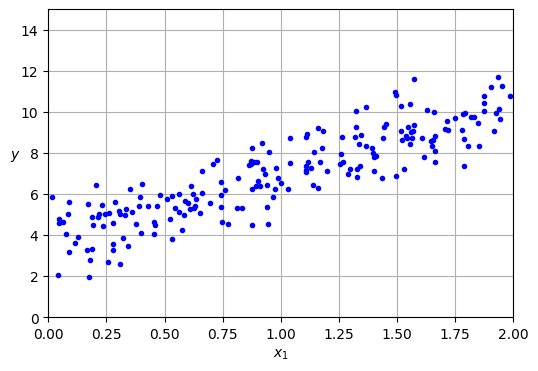

In [3]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.grid()
plt.axis([0,2,0,15])
plt.show()

### Normal Equation
$\hat{\theta} = (X^{\top} X)^{-1} X^{\top} y$



We can directly compute the model parameters with the normal eqn

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
print("X_b shape:",X_b.shape)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(theta_best)

X_b shape: (200, 2)
[[3.69084138]
 [3.32960458]]


In [5]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
print(X_new_b.shape)
y_predict = X_new_b @ theta_best
y_predict

(2, 2)


array([[ 3.69084138],
       [10.35005055]])

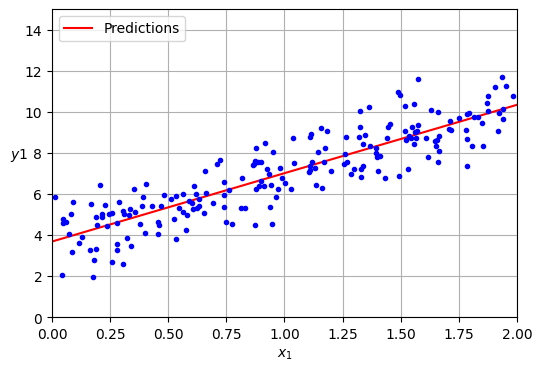

In [6]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict,"r-",label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y1$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.coef_,lin_reg.intercept_

(array([[3.32960458]]), array([3.69084138]))

### Gradient Descent
### Batch Gradient Descent

In [8]:
eta = 0.1 
n_epochs = 1000
m = len(X_b)

rng = np.random.default_rng(seed=42)
theta = rng.standard_normal((2,1)) # random initialization

for epoch in range(n_epochs):
    gradients = (2/m) * X_b.T @ (X_b @ theta - y)
    theta -= eta*gradients

print(gradients) 
print(theta)


[[ 5.78009862e-15]
 [-6.21638158e-15]]
[[3.69084138]
 [3.32960458]]


In [9]:
# from math import ceil

# n_epochs = 50
# minibatch_size = 20
# n_batches_per_epoch = ceil(m / minibatch_size)

# rng = np.random.default_rng(seed=42)
# theta = rng.standard_normal((2, 1))  # randomly initialized model parameters

# t0, t1 = 200, 1000  # learning schedule hyperparameters

# def learning_schedule(t):
#     return t0 / (t + t1)

# theta_path_bgd=[]
# theta_path_sgd=[]
# theta_path_mgd = []

# for epoch in range(n_epochs):
#     shuffled_indices = rng.permutation(m)
#     X_b_shuffled = X_b[shuffled_indices]
#     y_shuffled = y[shuffled_indices]
#     for iteration in range(0, n_batches_per_epoch):
#         idx = iteration * minibatch_size
#         xi = X_b_shuffled[idx : idx + minibatch_size]
#         yi = y_shuffled[idx : idx + minibatch_size]
#         gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
#         eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
#         theta = theta - eta * gradients
#         theta_path_mgd.append(theta)

# theta_path_bgd = np.array(theta_path_bgd)
# theta_path_sgd = np.array(theta_path_sgd)
# theta_path_mgd = np.array(theta_path_mgd)

# plt.figure(figsize=(7, 4))
# plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
#          label="Stochastic")
# plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
#          label="Mini-batch")
# plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
#          label="Batch")
# plt.legend(loc="upper left")
# plt.xlabel(r"$\theta_0$")
# plt.ylabel(r"$\theta_1$   ", rotation=0)
# plt.axis([2.7, 4.5, 2.6, 3.7])
# plt.grid()

# plt.show()


### Polynomial Regression

In [10]:
rng = np.random.default_rng(seed=42)
m = 200 
X = 6 * rng.random((m,1)) - 3
print(X.shape)
y = 0.5 * X ** 2 + X + 2 + rng.standard_normal((m,1))
print(y.shape)

(200, 1)
(200, 1)


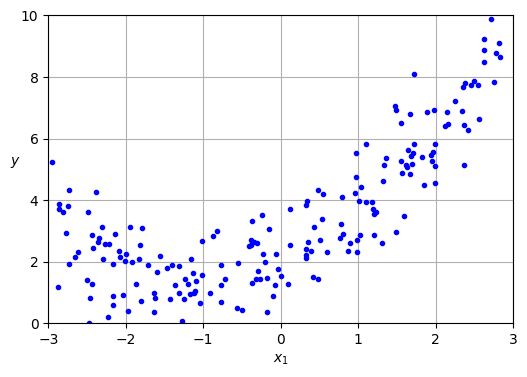

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()


In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X shape:",X.shape)
print("X_poly shape:",X_poly.shape)

X shape: (200, 1)
X_poly shape: (200, 2)


In [13]:
print(X[0])
print(X_poly[0])

[1.64373629]
[1.64373629 2.701869  ]


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.coef_,lin_reg.intercept_

(array([[1.11022126, 0.50526985]]), array([2.00540719]))

(100, 1)
(100, 2)


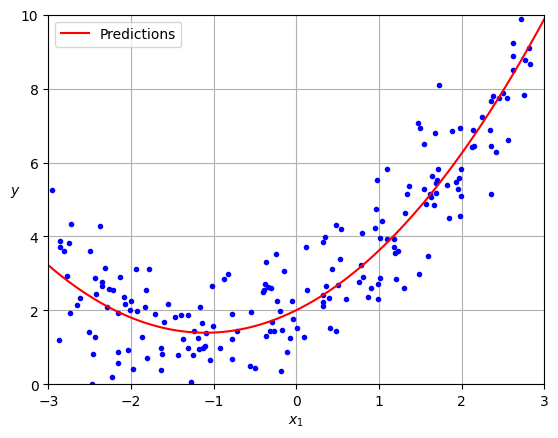

In [15]:
X_new = np.linspace(-3,3,100).reshape(100,1)
print(X_new.shape)
X_new_poly = poly_features.transform(X_new)
print(X_new_poly.shape)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new,y_new,'r-',label='Predictions')
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.legend(loc='upper left')
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

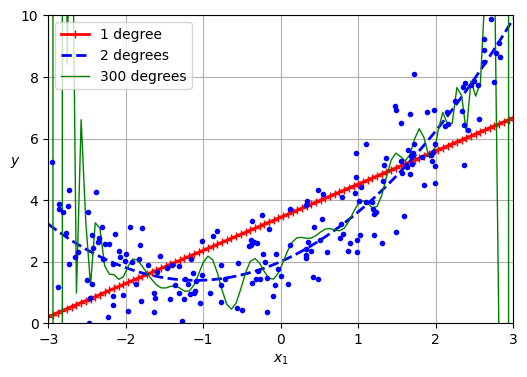

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = make_pipeline(polybig_features,std_scaler,lin_reg)
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

plt.show()


### Learning curve


In [17]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,valid_scores = learning_curve(
    LinearRegression(),
    X,y,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.01,1.0,40),
    cv=5,
    n_jobs=-1
)


print(train_sizes.shape)
print(train_scores.shape)
print(valid_scores.shape)

(40,)
(40, 5)
(40, 5)


In [18]:
train_errors = -train_scores.mean(axis=-1)
print(train_errors.shape)
valid_errors = -valid_scores.mean(axis=-1)
print(valid_errors.shape)


(40,)
(40,)


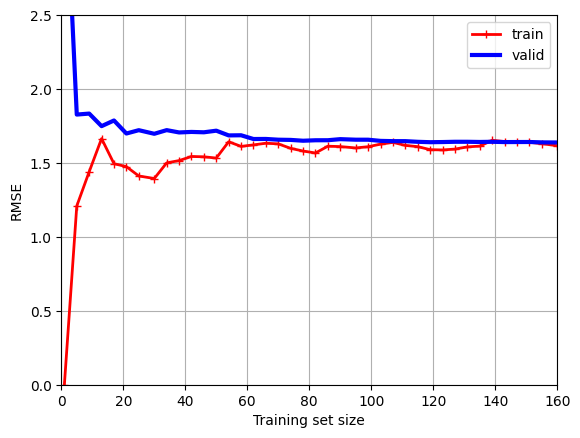

In [19]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 160, 0, 2.5])

plt.show()


This learning curve underfits as it performs poorly on training and validation set

(40,)
(40,)


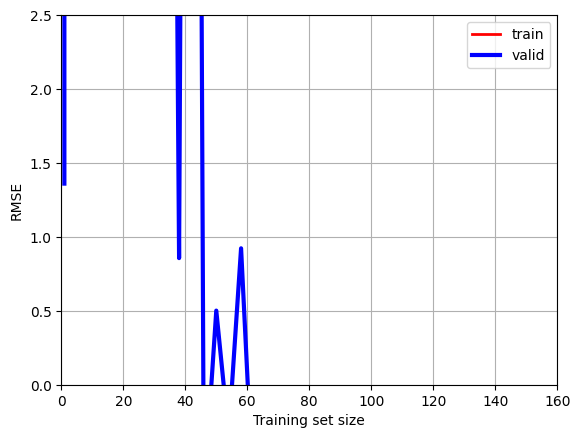

In [20]:
from sklearn.pipeline import make_pipeline 

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False),
    LinearRegression()
)

train_sizes,train_scores,valid_scores = learning_curve(
    polynomial_regression,
    X,y,
    train_sizes=np.linspace(0.01,1.0,40),
    cv=5,
    n_jobs=-1
)

train_errors = -train_scores.mean(axis=-1)
print(train_errors.shape)
valid_errors = -valid_scores.mean(axis=-1)
print(valid_errors.shape)

plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 160, 0, 2.5])

plt.show()


## Regularized Linear Regression 
### Ridge regression 

In [21]:
rng = np.random.default_rng(seed=42)
m = 20 
X = 3*rng.random((m,1))
y = 1 + 0.5 * X + rng.standard_normal((m,1)) / 1.5
X_new = np.linspace(0,3,100).reshape(100,1)
print(X_new.shape)
print(y.shape)

(100, 1)
(20, 1)


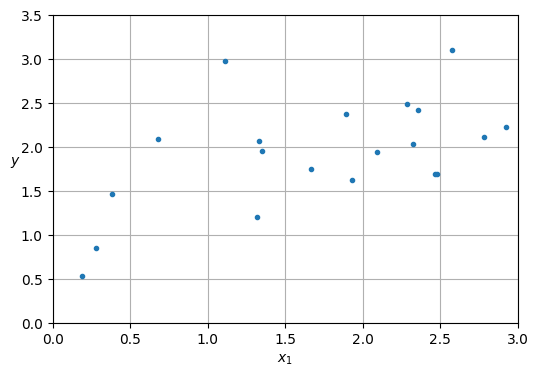

In [22]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'.')
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,3,0,3.5])
plt.grid()
plt.show()

In [23]:
from sklearn.linear_model import Ridge 

ridge_reg = Ridge(alpha=0.1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([1.84414523])

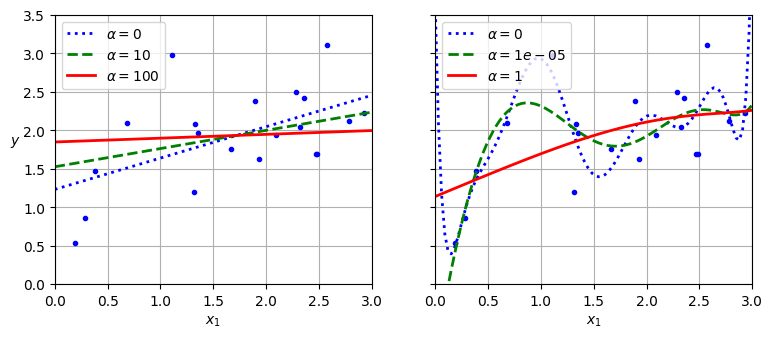

In [24]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2',alpha=0.1/m,tol=None,
                       max_iter=1000,eta0=0.01,random_state=42)

sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.83659707])

### Lasso Regression

In [26]:
from sklearn.linear_model import Lasso 

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([1.87550211])

### ElasticNet

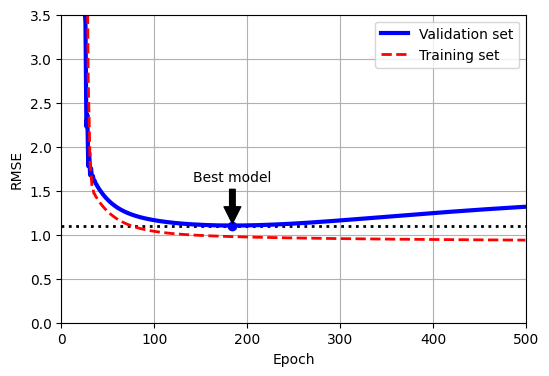

In [27]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
rng = np.random.default_rng(seed=42)
m = 200  # number of instances
X = 6 * rng.random((m, 1)) - 3
y = 0.5 * X ** 2 + X + 2 + rng.standard_normal((m, 1))
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    # performs one incremental learning step on model without resetting the model params
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()

plt.show()

### Decision Boundaries

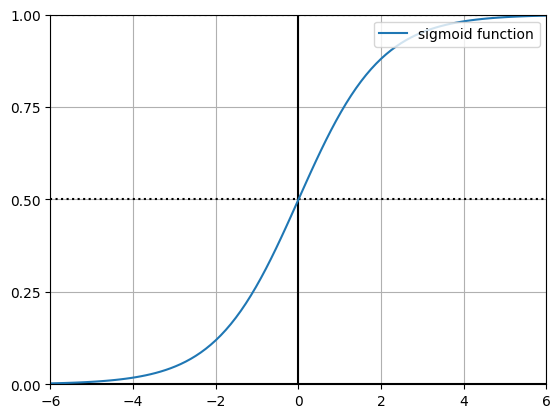

In [28]:
lim = 6 
t = np.linspace(-lim,lim,100)
sig = 1/(1 + np.exp(-t))
plt.plot([-lim,lim],[0,0],"k-")
plt.plot([-lim,lim],[0.5,0.5],"k:")
plt.plot([-lim,lim],[1,1],"k:")

plt.vlines(x=0,ymin=0,ymax=1,colors='k',linestyles='-')

plt.plot(t,sig,label="sigmoid function")
plt.legend(loc='upper right')
plt.axis([-lim,lim,0,1])
plt.gca().set_yticks([0,0.25,0.5,0.75,1])
plt.grid()
plt.show()

### Logistic Regression

In [29]:
from sklearn.datasets import load_iris 

iris = load_iris(as_frame=True)
print(iris.data.shape)
iris.data.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == "virginica"
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [32]:
X_train.shape

(112, 1)

(1000, 1)
(1000, 2)
1.6516516516516517


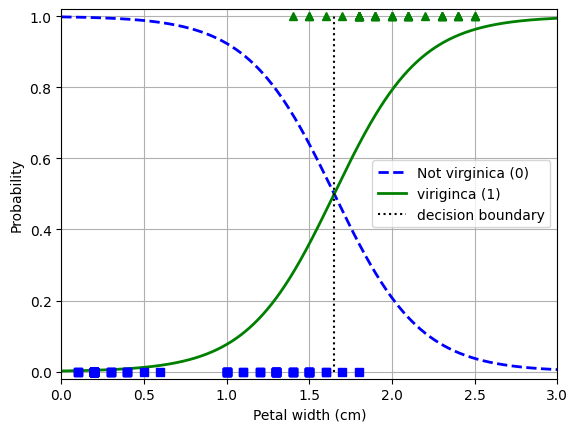

In [33]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
print(X_new.shape)
y_proba = log_reg.predict_proba(X_new)
print(y_proba.shape)

decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]
print(decision_boundary)

plt.plot(X_new,y_proba[:,0],linewidth=2,color='b',linestyle='--',label="Not virginica (0)")
plt.plot(X_new,y_proba[:,1],linewidth=2,color='g',linestyle='-',label="viriginca (1)")
plt.vlines(x=decision_boundary,ymin=0,ymax=1,color='black',linestyles='dotted',label='decision boundary')
plt.axis([0,3,-0.02,1.02])

plt.plot(X_train[y_train == 0],y_train[y_train == 0],'bs')
plt.plot(X_train[y_train == 1],y_train[y_train == 1],'g^')

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc='center left')
# plt.axis([0,3,-0.02,1])
plt.grid()
plt.legend()
plt.show()


In [34]:
log_reg.predict(decision_boundary.reshape(-1,1))

array([ True])

In [35]:
log_reg.predict(np.array([[1.7],[1.5]]))

array([ True, False])

X shape: (150, 2)
(200, 500)
(200, 500)
(100000, 2)
[[2.9        0.8       ]
 [2.90821643 0.8       ]
 [2.91643287 0.8       ]
 [2.9246493  0.8       ]
 [2.93286573 0.8       ]]
[[9.99765154e-01 2.34846007e-04]
 [9.99759178e-01 2.40822031e-04]
 [9.99753050e-01 2.46950087e-04]
 ...
 [9.41314643e-05 9.99905869e-01]
 [9.17952479e-05 9.99908205e-01]
 [8.95170080e-05 9.99910483e-01]]


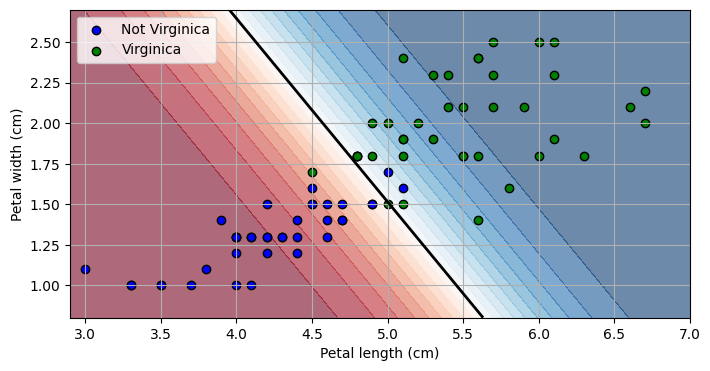

In [36]:
X = iris.data[["petal length (cm)","petal width (cm)"]].values 
print("X shape:",X.shape)
y = iris.target_names[iris.target] == "virginica"
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

log_reg = LogisticRegression(C=2,random_state=42)
log_reg.fit(X_train,y_train)

#x0: petal_length
#x1: petal width
# with mesh grid we create dense feature ranges for each feature 
# 500 values for petal length,petal width
# form all possible combinations for petal width and petal length

x0,x1 = np.meshgrid(np.linspace(2.9,7,500).reshape(-1,1),
                    np.linspace(0.8,2.7,200).reshape(-1,1))
print(x0.shape)
print(x1.shape)

# Combine the grids into a feature_matrix
X_new = np.c_[x0.ravel(),x1.ravel()]
# X_new shape:(200*500,2)
print(X_new.shape)
print(X_new[:5])

y_proba = log_reg.predict_proba(X_new)
print(y_proba)
zz = y_proba[:,1].reshape(x0.shape)
# zz is predicted prob of virginica 
# at every point on meshgrid its reshaped back into grid form so it plotted as contours 

plt.figure(figsize=(8, 4))

plt.contourf(x0, x1, zz, levels=20, cmap="RdBu", alpha=0.6)

# Decision boundary (P = 0.5)
plt.contour(x0, x1, zz, levels=[0.5], colors="k", linewidths=2)

# Training points
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
            c="blue", label="Not Virginica", edgecolors="k")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
            c="green", label="Virginica", edgecolors="k")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.axis([2.9, 7, 0.8, 2.7]) 
plt.grid()
plt.show()


### Softmax Regression

In [37]:
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

softmax_reg = LogisticRegression(C = 30,random_state=42)
softmax_reg.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",30
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [38]:
softmax_reg.predict([[5,2]])

array([2])

In [39]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])

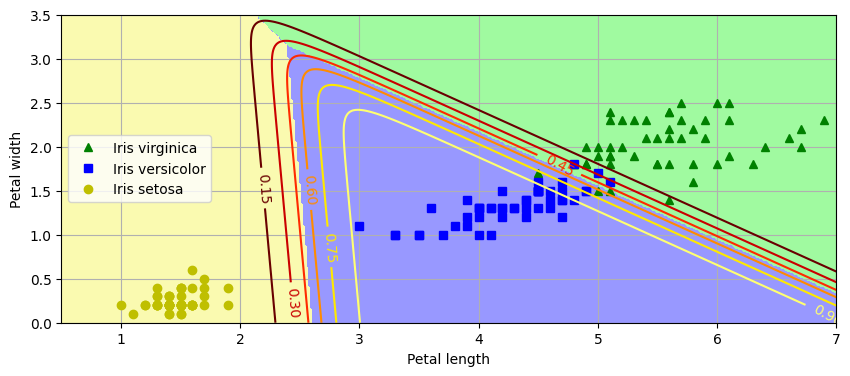

In [40]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()

plt.show()
